<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集介绍" data-toc-modified-id="数据集介绍-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集介绍</a></span></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#train.csv" data-toc-modified-id="train.csv-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>train.csv</a></span></li><li><span><a href="#store.csv" data-toc-modified-id="store.csv-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>store.csv</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#处理store.csv信息" data-toc-modified-id="处理store.csv信息-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>处理store.csv信息</a></span></li><li><span><a href="#处理特征" data-toc-modified-id="处理特征-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>处理特征</a></span></li></ul></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>模型训练</a></span><ul class="toc-item"><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>数据集划分</a></span></li><li><span><a href="#自定义评测指标" data-toc-modified-id="自定义评测指标-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>自定义评测指标</a></span></li><li><span><a href="#决策树" data-toc-modified-id="决策树-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>决策树</a></span></li><li><span><a href="#随机森林" data-toc-modified-id="随机森林-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>随机森林</a></span></li><li><span><a href="#XGBOOST" data-toc-modified-id="XGBOOST-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>XGBOOST</a></span></li><li><span><a href="#调参" data-toc-modified-id="调参-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>调参</a></span></li><li><span><a href="#汇总" data-toc-modified-id="汇总-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>汇总</a></span></li></ul></li></ul></div>

# 数据集介绍

https://www.kaggle.com/c/rossmann-store-sales

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

Submissions are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as

$$
\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{y_i}\right)^2},
$$

where y_i denotes the sales of a single store on a single day and yhat_i denotes the corresponding prediction. Any day and store with 0 sales is ignored in scoring.

**Files**
+ train.csv - historical data including Sales
+ test.csv - historical data excluding Sales
+ sample_submission.csv - a sample submission file in the correct format
+ store.csv - supplemental information about the stores

**Data fields**
+ Id - an Id that represents a (Store, Date) duple within the test set
+ Store - a unique Id for each store
+ Sales - the turnover for any given day (this is what you are predicting)
+ Customers - the number of customers on a given day
+ Open - an indicator for whether the store was open: 0 = closed, 1 = open
+ StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
+ SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
+ StoreType - differentiates between 4 different store models: a, b, c, d
+ Assortment - describes an assortment level: a = basic, b = extra, c = extended
+ CompetitionDistance - distance in meters to the nearest competitor store
+ CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
+ Promo - indicates whether a store is running a promo on that day
+ Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
+ Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
+ PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 数据分析

In [67]:
! wc -l ../../../../Workspace/Datasets/RossmanStore/train.csv

 1017210 ../../../../Workspace/Datasets/RossmanStore/train.csv


In [68]:
total_rows = 1017210

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np

In [70]:
dtypes = {
    'Store': 'uint16',
    'Sales': 'uint64',
    'Customers': 'uint64',
    'Open': 'uint8',
    'SchoolHoliday': 'uint8',
    'CompetitionDistance': 'uint8',
    'CompetitionOpenSinceMonth': 'uint8',
    'CompetitionOpenSinceYear': 'uint16',
    'Promo': 'uint8',
    'Promo2': 'uint8',
    'Promo2SinceWeek': 'uint8',
    'Promo2SinceYear': 'uint16',
    'StateHoliday': 'category',
    'StoreType': 'category',
    'Assortment': 'category',
    'DayOfWeek': 'uint8'
}

In [71]:
df_train = pd.read_csv('../../../../Workspace/Datasets/RossmanStore/train.csv', 
                       parse_dates=[2], dtype=dtypes,
                       nrows=int(total_rows * 0.08))
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [72]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81376 entries, 0 to 81375
Data columns (total 9 columns):
Store            81376 non-null uint16
DayOfWeek        81376 non-null uint8
Date             81376 non-null datetime64[ns]
Sales            81376 non-null uint64
Customers        81376 non-null uint64
Open             81376 non-null uint8
Promo            81376 non-null uint8
StateHoliday     81376 non-null category
SchoolHoliday    81376 non-null uint8
dtypes: category(1), datetime64[ns](1), uint16(1), uint64(2), uint8(4)
memory usage: 2.4 MB


In [73]:
df_store = pd.read_csv('../../../../Workspace/Datasets/RossmanStore/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [74]:
df_store.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 262.1 KB


In [75]:
not_open = df_train[(df_train['Open'] == False) & (df_train['Sales'] != 0)]
not_open.size

0

没有开的商店的销量都是为0的，证明了数据集的正确性。

In [76]:
df_train = df_train[df_train['Sales'] > 0]

In [77]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [78]:
%matplotlib inline

In [79]:
from matplotlib import pyplot as plt

In [80]:
plt.rcParams['figure.figsize'] = (7, 5)

In [81]:
sns.set_palette("viridis")

## train.csv

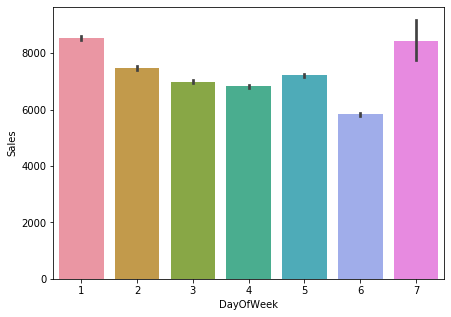

In [82]:
sns.barplot(x='DayOfWeek', y='Sales', data=df_train)

可以观察到星期一和星期天的销量最高，星期六的销量最少，其他几天的销量差不多。

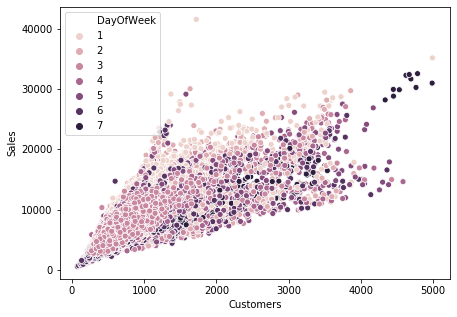

In [83]:
sns.scatterplot(x='Customers', y='Sales', hue='DayOfWeek', data=df_train, legend='full')

从图中可以看到，无论是星期几，顾客人数和销售量都成线性关系。并且可以看到，星期一和星期天的斜率较高，星期四和五的斜率较低。

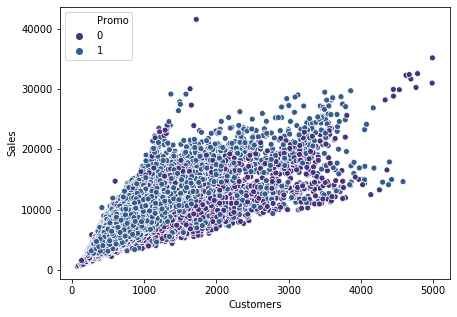

In [84]:
sns.scatterplot(x='Customers', y='Sales', hue='Promo', data=df_train, legend='full')

从图中可以看到，促销的销售量总体高于非促销时间，并且斜率更高。

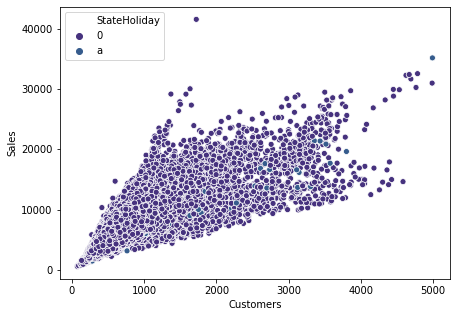

In [85]:
sns.scatterplot(x='Customers', y='Sales', hue='StateHoliday', data=df_train, legend='full')

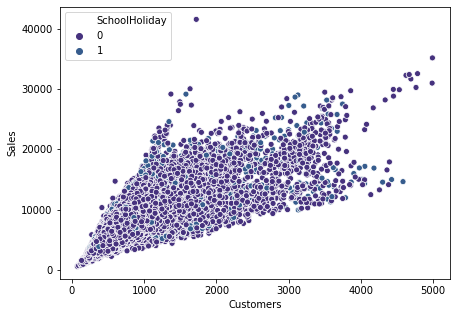

In [86]:
sns.scatterplot(x='Customers', y='Sales', hue='SchoolHoliday', data=df_train, legend='full')

学校是否放假对销售量的影响不明显，我觉得应该是因为数据是药品相关的，学校是否放假跟销量并无太大相关。

## store.csv

In [87]:
df_store.set_index('Store', inplace=True)
df_store.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [88]:
df_store['AvgSalesPerDay'] = df_train.groupby(by='Store')['Sales'].mean()
df_store.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSalesPerDay
Store,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4445.163934
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4964.935484
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7078.573770
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,9914.709677
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4629.838710


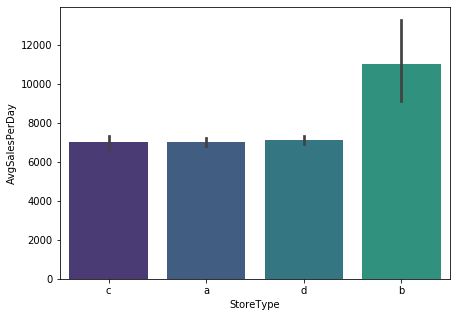

In [89]:
sns.barplot(x='StoreType', y='AvgSalesPerDay', data=df_store)

类型为b的商店平均销售量最高

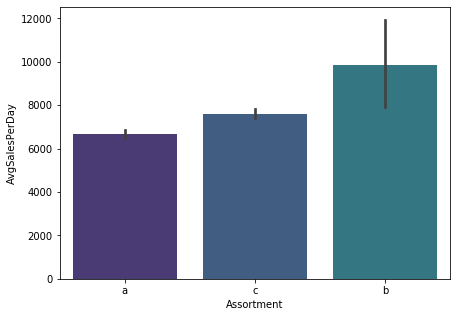

In [90]:
sns.barplot(x='Assortment', y='AvgSalesPerDay', data=df_store)

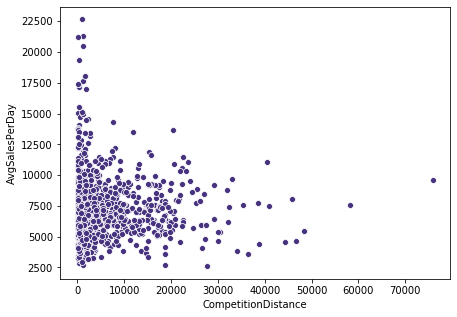

In [91]:
sns.scatterplot(x='CompetitionDistance', y='AvgSalesPerDay', data=df_store)

竞争对手的距离对于平均销售量并无特别明显的影响。

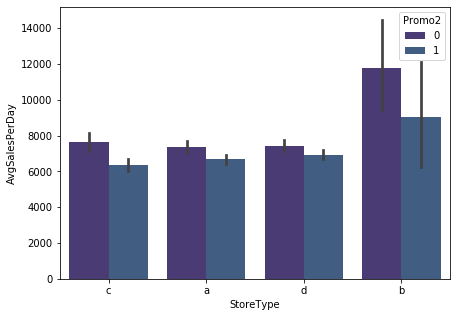

In [92]:
sns.barplot(x='StoreType', y='AvgSalesPerDay', hue='Promo2', data=df_store)

不管是哪一种类型的商店，不参加打折反而平均销售量更高？

# 数据预处理

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('../../../../Workspace/Datasets/RossmanStore/train.csv', parse_dates=['Date'])
df_train.head()

/Users/yangqj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df_store = pd.read_csv('../../../../Workspace/Datasets/RossmanStore/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv('../../../../Workspace/Datasets/RossmanStore/test.csv',
                       parse_dates=['Date'])
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


+ 训练集比测试集多出来的特征是`Customers`，从上面的分析结果可以看到顾客人数对于销售量的影响是非常大的，因此需要在特征中增加顾客人数的相关特征。
+ 另外，销售量虽然是一个目标值，但是我们可以根据以往时间的销售量来估计未来时间点的销售量，因此需要构建以往销售量的特征。
+ 销售量和顾客人数也可以创建联合特征，比如平均每个顾客的销售量
+ Promo2, Promo2SinceYear，Promo2SinceWeek和PromoInterval可以与记录的日期创建多个特征，比如已经进行打折活动2多少年了，今年的打折活动2已经进行多久了，是否还是在打折活动2期间，以往打折活动2期间的平均销售额是多少。
+ 另外，CompetitionOpenSinceYear和CompetitionOpenSinceMonth还可以构建出竞争对手已经存在多久等特征。

## 处理store.csv信息

In [5]:
# 填充NA值
df_store.fillna(0, inplace=True)

# 修改类型以降低内存
columns_uint8 = ['Promo2', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek']
df_store['StoreType'] = df_store['StoreType'].astype('category').cat.codes
df_store['Assortment'] = df_store['Assortment'].astype('category').cat.codes

df_store[columns_uint8] = df_store[columns_uint8].astype('uint8')
columns_uint32 = ['CompetitionOpenSinceYear', 'Promo2SinceYear']
df_store[columns_uint32] = df_store[columns_uint32].astype('uint32')

In [6]:
df_train['SalesPerCus'] = df_train['Sales'] / df_train['Customers']

In [7]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCus
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [8]:
# 通过训练集获取平均顾客数，平均销售额以及平均每个顾客的销售额及其平均数
avg_df_train = df_train[['Store', 'Sales', 'Customers', 'SalesPerCus']].groupby(by=['Store']).mean()
avg_df_train.rename(columns=lambda x: 'Avg' + x, inplace=True)

med_df_train = df_train[['Store', 'Sales', 'Customers', 'SalesPerCus']].groupby(by=['Store']).median()
med_df_train.rename(columns=lambda x: 'Med' + x, inplace=True)

df_store = pd.merge(df_store, avg_df_train.reset_index(), on='Store')
df_store = pd.merge(df_store, med_df_train.reset_index(), on='Store')

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCus,MedSales,MedCustomers,MedSalesPerCus
0,1,2,0,1270.0,9,2008,0,0,0,0,3945.704883,467.646497,8.393038,4373.5,529.0,8.362376
1,2,0,0,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443,4395.5,542.0,8.313092
2,3,0,0,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599,5892.0,705.0,9.123440
3,4,2,2,620.0,9,2009,0,0,0,0,8021.769639,1100.057325,7.249827,9062.0,1261.5,7.215175
4,5,0,0,29910.0,4,2015,0,0,0,0,3867.110403,444.360934,8.611229,4180.0,537.0,8.584677


In [9]:
MONTH_ABBR = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

MONTH_ABBR_INT = dict(zip(MONTH_ABBR, list(range(1, len(MONTH_ABBR) + 1))))

MONTH_ABBR_INT['AfterDec'] = 13
MONTH_ABBR_INT['BeforeJan'] = 0
MONTH_ABBR_INT

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sept': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12,
 'AfterDec': 13,
 'BeforeJan': 0}

In [10]:
# 处理特殊值以方便后面转换促销2的起止月份
df_store['PromoInterval'].replace(0, 'AfterDec,BeforeJan', inplace=True)

In [11]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,AvgSales,AvgCustomers,AvgSalesPerCus,MedSales,MedCustomers,MedSalesPerCus
0,1,2,0,1270.0,9,2008,0,0,0,"AfterDec,BeforeJan",3945.704883,467.646497,8.393038,4373.5,529.0,8.362376
1,2,0,0,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4122.991507,486.045648,8.408443,4395.5,542.0,8.313092
2,3,0,0,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5741.253715,620.286624,9.117599,5892.0,705.0,9.123440
3,4,2,2,620.0,9,2009,0,0,0,"AfterDec,BeforeJan",8021.769639,1100.057325,7.249827,9062.0,1261.5,7.215175
4,5,0,0,29910.0,4,2015,0,0,0,"AfterDec,BeforeJan",3867.110403,444.360934,8.611229,4180.0,537.0,8.584677


In [12]:
df_store['Promo2StartMonth'] = df_store['PromoInterval'].str.extract(r'^(\w+),')
df_store['Promo2StartMonth'] = df_store['Promo2StartMonth'].apply(lambda x: MONTH_ABBR_INT[x])

In [13]:
df_store['Promo2EndMonth'] = df_store['PromoInterval'].str.extract(r',(\w+)$')
df_store['Promo2EndMonth'] = df_store['Promo2EndMonth'].apply(lambda x: MONTH_ABBR_INT[x])

## 处理特征

In [14]:
def process_features(df_data, df_store):
    # fill na
    df_data.fillna(0, inplace=True)
    
    
    # change data type
    columns_uint8 = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday']
    df_data[columns_uint8] = df_data[columns_uint8].astype('uint8')
    df_data['StateHoliday'] = df_data['StateHoliday'].astype('category').cat.codes
    
    
    # merge features
    df_merge = pd.merge(df_data, df_store, how='left', on='Store')
    
    # add feature
    df_merge['Year'] = df_merge['Date'].dt.year
    df_merge['Month'] = df_merge['Date'].dt.month
    df_merge['Day'] = df_merge['Date'].dt.day
    df_merge['WeekOfYear'] = df_merge['Date'].dt.weekofyear
    
    # how many years the promo2 has existed
    df_merge['Promo2BeginYears'] = df_merge['Year'] - df_merge['Promo2SinceYear']
    # how many weeks the promo2 has existed
    df_merge['Promo2BeginWeeks'] = \
        (52 - df_merge['Promo2SinceWeek']) + \
        52 * (df_merge['Year'] - df_merge['Promo2SinceYear'] - 1) + \
        df_merge['WeekOfYear']
    
    # whether store is during promo2 for current date
    df_merge.loc[(df_merge['Month'] >= df_merge['Promo2StartMonth']) & \
                 (df_merge['Month'] <= df_merge['Promo2EndMonth']), \
                 'DuringPromo2'] = 1
    df_merge['DuringPromo2'].fillna(0, inplace=True)
    
    
    # how many days the promo2 exist in current year
    df_merge['Promo2StartDays'] = df_merge['DuringPromo2'] * \
        (30 * (df_merge['Month'] - df_merge['Promo2StartMonth']) + df_merge['Day'])
    
    
    # how many years the competition has opened
    df_merge['CompetitionOpenYear'] = df_merge['Year'] - df_merge['CompetitionOpenSinceYear']
    # how many months the competition has opened
    df_merge['CompetitionOpenMonth'] = \
        (12 - df_merge['CompetitionOpenSinceMonth']) + \
        12 * (df_merge['Year'] - df_merge['CompetitionOpenSinceYear'] - 1) + \
        df_merge['Month']
        
    return df_merge

In [15]:
df_test = process_features(df_test, df_store)

In [16]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Year,Month,Day,WeekOfYear,Promo2BeginYears,Promo2BeginWeeks,DuringPromo2,Promo2StartDays,CompetitionOpenYear,CompetitionOpenMonth
0,1,1,4,2015-09-17,1,1,0,0,2,0,...,2015,9,17,38,2015,104818,0.0,-0.0,7,84
1,2,3,4,2015-09-17,1,1,0,0,0,0,...,2015,9,17,38,4,232,1.0,257.0,9,105
2,3,7,4,2015-09-17,1,1,0,0,0,2,...,2015,9,17,38,2015,104818,0.0,-0.0,2,29
3,4,8,4,2015-09-17,1,1,0,0,0,0,...,2015,9,17,38,2015,104818,0.0,-0.0,1,11
4,5,9,4,2015-09-17,1,1,0,0,0,2,...,2015,9,17,38,2015,104818,0.0,-0.0,15,181


In [17]:
df_train = process_features(df_train, df_store)

In [18]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCus,...,Year,Month,Day,WeekOfYear,Promo2BeginYears,Promo2BeginWeeks,DuringPromo2,Promo2StartDays,CompetitionOpenYear,CompetitionOpenMonth
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,2015,7,31,31,2015,104811,0.0,-0.0,7,82
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,2015,7,31,31,5,278,1.0,211.0,8,92
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,2015,7,31,31,4,225,1.0,211.0,9,103
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,2015,7,31,31,2015,104811,0.0,-0.0,6,70
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,2015,7,31,31,2015,104811,0.0,-0.0,0,3


In [19]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'AvgSales',
       'AvgCustomers', 'AvgSalesPerCus', 'MedSales', 'MedCustomers',
       'MedSalesPerCus', 'Promo2StartMonth', 'Promo2EndMonth', 'Year', 'Month',
       'Day', 'WeekOfYear', 'Promo2BeginYears', 'Promo2BeginWeeks',
       'DuringPromo2', 'Promo2StartDays', 'CompetitionOpenYear',
       'CompetitionOpenMonth'],
      dtype='object')

# 模型训练

In [19]:
feature_columns = ['Store',
                    'DayOfWeek',
        #             'Date', # Date已经转化为Year, Month, Day特征
#                     'Open',
                    'Promo',
                    'StateHoliday',
                    'SchoolHoliday',
                    'StoreType',
                    'Assortment',
                    'CompetitionDistance',
        #             'CompetitionOpenSinceMonth', # 已经转化为CompetitionOpenYear和CompetitionOpenMonth特征
        #             'CompetitionOpenSinceYear',
        #             'Promo2',
        #             'Promo2SinceWeek', # 已经转化为DuringPromo2, Promo2StartDays,Promo2BeginYears,Promo2BeginWeeks特征
        #             'Promo2SinceYear',
        #             'PromoInterval',
                    'AvgSales',
                    'AvgCustomers',
                    'AvgSalesPerCus',
                    'MedSales',
                    'MedCustomers',
                    'MedSalesPerCus',
        #             'Promo2StartMonth',
        #             'Promo2EndMonth',
                    'Year',
                    'Month',
                    'Day',
                    'WeekOfYear',
                    'Promo2BeginYears',
                    'Promo2BeginWeeks',
                    'DuringPromo2',
                    'Promo2StartDays',
                    'CompetitionOpenYear',
                    'CompetitionOpenMonth']

In [20]:
target_column = 'Sales'

## 数据集划分

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_X, test_X, train_y, test_y = train_test_split(df_train[feature_columns], 
                                                    df_train[target_column], 
                                                    test_size = 0.25)

## 自定义评测指标

In [26]:
from sklearn.metrics import make_scorer

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
def rmspe(y_true, y_predict):
    not_zero_index = y_true > 0
    
    return np.sqrt(np.mean(((y_true[not_zero_index] - y_predict[not_zero_index]) / y_true[not_zero_index]) ** 2))

In [29]:
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

In [40]:
def score(model, train_X, train_y):
    cv_scores = cross_val_score(model, train_X, train_y, scoring=rmspe_scorer, cv=5)
    print('cv_scores: ', cv_scores)
    print('mean {:.4f}'.format(cv_scores.mean()))
    print('variance {:.4f}'.format(cv_scores.var()))

In [31]:
rmspe_models = {}

## 决策树

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [34]:
def plot_feature_importance(feature_importances, feature_names):
    df = pd.DataFrame(feature_importances, columns=['importance'], index=feature_names)
    df.sort_values(by=['importance'], ascending=False, inplace=True)
    df.plot.barh()

In [35]:
%matplotlib inline

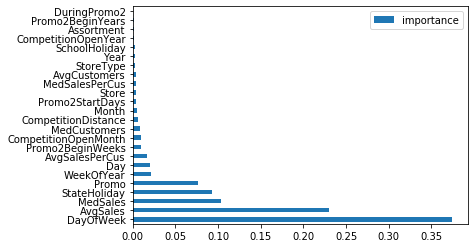

In [37]:
plot_feature_importance(decision_tree.feature_importances_, train_X.columns)

In [38]:
y_pred = decision_tree.predict(test_X)

rmspe_models['decision_tree'] = rmspe(test_y, y_pred)
rmspe_models['decision_tree']

0.17810053196035378

In [41]:
score(decision_tree, train_X, train_y)

cv_scores:  [-0.33700993 -0.17616626 -0.17078299 -0.1884032  -0.2616286 ]
mean -0.2268
variance 0.0041


均值出现负数应该是跟`greater_is_better`设置为False有关系，在rmspe函数中计算出来的结果其实都是正的。

## 随机森林

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
%%time

random_forest = RandomForestRegressor(n_estimators=20)
random_forest.fit(train_X, train_y)

CPU times: user 3min 55s, sys: 2.28 s, total: 3min 57s
Wall time: 4min 2s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

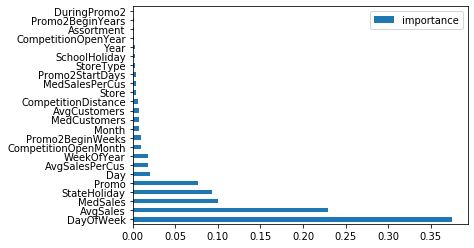

In [44]:
plot_feature_importance(random_forest.feature_importances_, train_X.columns)

In [79]:
y_pred = random_forest.predict(test_X)

rmspe_models['random_forest'] = rmspe(test_y, y_pred)
rmspe_models['random_forest']

0.13733682406901673

In [46]:
score(random_forest, train_X, train_y) 

cv_scores:  [-0.316578   -0.13541364 -0.12969791 -0.15760452 -0.24434614]
mean -0.1967
variance 0.0053


## XGBOOST

In [47]:
from xgboost import XGBRegressor

In [48]:
xgb_regressor = XGBRegressor(n_estimators=max_depth=10, 
                             n_estimators=200, 
                             subsample=0.9, 
                             colsample_bytree=0.9, 
                            )
xgb_regressor.fit(train_X, train_y)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:36:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

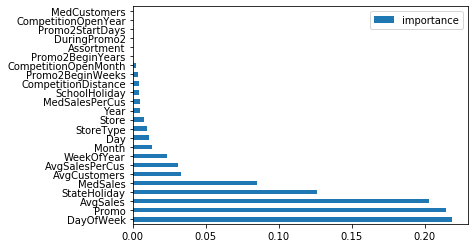

In [49]:
plot_feature_importance(xgb_regressor.feature_importances_, train_X.columns)

In [50]:
y_pred = xgb_regressor.predict(test_X)

rmspe_models['xgboost'] = rmspe(test_y, y_pred)
rmspe_models['xgboost']

0.23333891903770743

In [51]:
score(xgb_regressor, train_X, train_y)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cv_scores:  [-0.38632998 -0.23087058 -0.22725317 -0.26991379 -0.32859455]
mean -0.2886
variance 0.0037


## 调参

为了在XGBOOST的训练过程中使用自定义的损失函数，因此需要使用xgboost的内置训练接口和数据格式

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(train_X, train_y)
dtest = xgb.DMatrix(test_X, test_y)

/Users/yangqj/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [69]:
def rmspe_xgb(y_predict, y_true):
    """
       Calculate rmspe for XGBOOST.
       
       y_true: DMatrix, groudn truth.
       y_predict: numpy
    """
    return 'rmspe', rmspe(y_true.get_label(), y_predict)

In [87]:
%%time

params = {'max_depth': 5,
          'colsample_bytree': 0.95,
          'subsample': 0.95}
ntrees = 300
watchlist  = [(dtest,'eval_data')]

model = xgb.train(params, 
                  dtrain=dtrain, 
                  num_boost_round=ntrees, 
                  feval=rmspe_xgb,
                  evals=watchlist,
                  verbose_eval=10)

[0]	eval_data-rmse:5004.9	eval_data-rmspe:0.688006
[10]	eval_data-rmse:1243.39	eval_data-rmspe:0.22953
[20]	eval_data-rmse:1135.3	eval_data-rmspe:0.215569
[30]	eval_data-rmse:1074.77	eval_data-rmspe:0.200181
[40]	eval_data-rmse:1046.59	eval_data-rmspe:0.195173
[50]	eval_data-rmse:1021.9	eval_data-rmspe:0.191102
[60]	eval_data-rmse:1002.17	eval_data-rmspe:0.187559
[70]	eval_data-rmse:988.78	eval_data-rmspe:0.184586
[80]	eval_data-rmse:974.076	eval_data-rmspe:0.181814
[90]	eval_data-rmse:962.457	eval_data-rmspe:0.180269
[100]	eval_data-rmse:952.278	eval_data-rmspe:0.177926
[110]	eval_data-rmse:942.191	eval_data-rmspe:0.176779
[120]	eval_data-rmse:932.495	eval_data-rmspe:0.174653
[130]	eval_data-rmse:924.217	eval_data-rmspe:0.173466
[140]	eval_data-rmse:916.635	eval_data-rmspe:0.171557
[150]	eval_data-rmse:909.723	eval_data-rmspe:0.170724
[160]	eval_data-rmse:903.755	eval_data-rmspe:0.169786
[170]	eval_data-rmse:896.017	eval_data-rmspe:0.168598
[180]	eval_data-rmse:887.381	eval_data-rmspe

In [88]:
rmspe(test_y, model.predict(dtest))

0.1580594552502168